# Alternative fuel station data 
https://afdc.energy.gov/stations/#/find/nearest

# 1. Set environment & libraries

In [ ]:
# Set an environment for geopandas & other geo-related libraries 

# Aclima/Purple Air 

%%time 

# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 

# Geo-related libraries
!pip install geopandas
!pip install osmnx
!pip install contextily
!pip install folium
!pip install plotly_express
!pip install geofeather

# Others
!pip install matplotlib==3.1.3

In [2]:
#Data manipulation libraries
import pandas as pd
import numpy as np
import os

# Geo-related libraries
import geopandas as gpd
import osmnx as ox
import folium
from folium.plugins import HeatMap
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import contextily as ctx
import geofeather
from geopandas import GeoDataFrame
from shapely.geometry import Point
from shapely import wkt
from shapely.geometry import Point, MultiPoint
from shapely.ops import nearest_points
from shapely import wkt

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns




In [30]:
! python3 -mpip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 2. Load data 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/Colab\ Notebooks/my_project

/content/drive/MyDrive/Colab Notebooks/my_project


In [5]:
df1 = pd.read_csv("alt_fuel_stations (Nov 15 2022).csv")

<ipython-input-5-3a15ccd790ec>:1: DtypeWarning: Columns (6,16,20,31,33,43,46,49,52,57,58,60,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("alt_fuel_stations (Nov 15 2022).csv")


## 2.1 Understand the data

In [7]:
df1.head()

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,Expected Date,Groups With Access Code,Access Days Time,Cards Accepted,BD Blends,NG Fill Type Code,NG PSI,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Other Info,EV Network,EV Network Web,Geocode Status,Latitude,Longitude,Date Last Confirmed,ID,Updated At,Owner Type Code,Federal Agency ID,Federal Agency Name,Open Date,Hydrogen Status Link,NG Vehicle Class,LPG Primary,E85 Blender Pump,EV Connector Types,Country,Intersection Directions (French),Access Days Time (French),BD Blends (French),Groups With Access Code (French),Hydrogen Is Retail,Access Code,Access Detail Code,Federal Agency Code,Facility Type,CNG Dispenser Num,CNG On-Site Renewable Source,CNG Total Compression Capacity,CNG Storage Capacity,LNG On-Site Renewable Source,E85 Other Ethanol Blends,EV Pricing,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access
0,CNG,Arkansas Oklahoma Gas Corp,2100 S Waldron Rd,NaN,Fort Smith,AR,72903,NaN,479-783-3188,E,NaN,Public - Credit card at all times,24 hours daily,FuelMan M V Wright_Exp,NaN,Q,3600,NaN,NaN,NaN,NaN,NaN,NaN,200-9,35.362213,-94.375338,2022-06-14,73,2022-06-14 16:22:47 UTC,T,NaN,NaN,1997-01-01,NaN,MD,NaN,NaN,NaN,US,NaN,NaN,NaN,Public - Carte de crédit en tout temps,NaN,public,CREDIT_CARD_ALWAYS,NaN,UTILITY,1.0,NONE,250.0,57855.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q,3600,MD,NaN,NaN,False
1,CNG,Clean Energy - Logan International Airport,1000 Cottage St Ext,"From Route 1, take the first exit after Callahan Tunnel. Located near the Massachusetts State Police Troop F building on Service Rd.",East Boston,MA,2128,NaN,866-809-4869,E,NaN,Public - Credit card at all times,24 hours daily; call 866-809-4869 for Clean Energy card,A CleanEnergy Comdata D FuelMan M V Voyager Wright_Exp,NaN,Q,3000 3600,NaN,NaN,NaN,NaN,NaN,NaN,GPS,42.374706,-71.026549,2021-08-04,81,2022-08-30 23:26:09 UTC,SG,NaN,NaN,1996-11-15,NaN,MD,NaN,NaN,NaN,US,NaN,NaN,NaN,Public - Carte de crédit en tout temps,NaN,public,CREDIT_CARD_ALWAYS,NaN,AIRPORT,4.0,NONE,850.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q,3000 3600,MD,NaN,NaN,False
2,CNG,Clean Energy - Everett - National Grid,16 Rover St,"Rt 16, exit to Rt 99, to Dexter St to Rover. Or Rt 99 to Robin St, to Rover St",Everett,MA,2149,NaN,866-809-4869,E,NaN,Public - Credit card at all times,24 hours daily; call 866-809-4869 for Clean Energy card,CleanEnergy D FleetOne FuelMan M V Voyager Wright_Exp,NaN,Q,3000 3600,NaN,NaN,NaN,NaN,NaN,NaN,200-8,42.393167,-71.064352,2021-05-06,84,2022-08-30 23:26:09 UTC,T,NaN,NaN,1996-11-15,NaN,HD,NaN,NaN,NaN,US,NaN,NaN,NaN,Public - Carte de crédit en tout temps,NaN,public,CREDIT_CARD_ALWAYS,NaN,STANDALONE_STATION,1.0,NONE,425.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q,3000 3600,HD,NaN,NaN,False
3,CNG,Clean Energy - Greenpoint - National Grid,287 Maspeth Ave,"I-278/Brooklyn Queens Expy, exit onto Vandervoort Ave S, left onto Maspeth Ave, and the station is on the left",Brooklyn,NY,11211,NaN,866-809-4869,E,NaN,Public - Credit card at all times,24 hours daily; call 866-809-4869 for Clean Energy card,CleanEnergy D FuelMan M V Voyager Wright_Exp,NaN,Q,3000 3600,NaN,NaN,NaN,NaN,NaN,NaN,200-8,40.718037,-73.932309,2021-05-06,108,2022-08-30 23:26:09 UTC,T,NaN,NaN,2016-07-15,NaN,HD,NaN,NaN,NaN,US,NaN,NaN,NaN,Public - Carte de crédit en tout temps,NaN,public,CREDIT_CARD_ALWAYS,NaN,UTILITY,1.0,NONE,1200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q,3000 3600,HD,NaN,NaN,False
4,CNG,Canarsie - National Grid,8424 Ditmas Ave,"From Shore Pkwy, take Rockaway Pkwy N, left onto Ditmas Ave, and station is on the left",Brooklyn,NY,11236,NaN,866-809-4869,E,NaN,Public - Credit card at all times,24 hours daily; call 866-809-4869 for Clean Energy card; Also accepts OGS,CleanEnergy D FleetOne FuelMan M Proprietor V Voyager Wright_Exp,NaN,B,3000 3600,NaN,NaN,NaN,NaN,NaN,NaN,200-8,40.645540

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56570 entries, 0 to 56569
Data columns (total 65 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Fuel Type Code                    56570 non-null  object 
 1   Station Name                      56570 non-null  object 
 2   Street Address                    56570 non-null  object 
 3   Intersection Directions           3932 non-null   object 
 4   City                              56570 non-null  object 
 5   State                             56569 non-null  object 
 6   ZIP                               56570 non-null  object 
 7   Plus4                             0 non-null      float64
 8   Station Phone                     55902 non-null  object 
 9   Status Code                       56570 non-null  object 
 10  Expected Date                     0 non-null      float64
 11  Groups With Access Code           56570 non-null  object 
 12  Acce

## 2.2 Convert pd df to gpd df

In [9]:
gdf_degree = gpd.GeoDataFrame(df1, geometry=gpd.points_from_xy(df1.Longitude, df1.Latitude), crs={'init' :'epsg:4326'})
gdf_degree.info()

/usr/local/lib/python3.8/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 56570 entries, 0 to 56569
Data columns (total 66 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Fuel Type Code                    56570 non-null  object  
 1   Station Name                      56570 non-null  object  
 2   Street Address                    56570 non-null  object  
 3   Intersection Directions           3932 non-null   object  
 4   City                              56570 non-null  object  
 5   State                             56569 non-null  object  
 6   ZIP                               56570 non-null  object  
 7   Plus4                             0 non-null      float64 
 8   Station Phone                     55902 non-null  object  
 9   Status Code                       56570 non-null  object  
 10  Expected Date                     0 non-null      float64 
 11  Groups With Access Code           56570 non-nu

In [10]:
gdf_degree.to_crs(epsg=3857)

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,Expected Date,Groups With Access Code,Access Days Time,Cards Accepted,BD Blends,NG Fill Type Code,NG PSI,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Other Info,EV Network,EV Network Web,Geocode Status,Latitude,Longitude,Date Last Confirmed,ID,Updated At,Owner Type Code,Federal Agency ID,Federal Agency Name,Open Date,Hydrogen Status Link,NG Vehicle Class,LPG Primary,E85 Blender Pump,EV Connector Types,Country,Intersection Directions (French),Access Days Time (French),BD Blends (French),Groups With Access Code (French),Hydrogen Is Retail,Access Code,Access Detail Code,Federal Agency Code,Facility Type,CNG Dispenser Num,CNG On-Site Renewable Source,CNG Total Compression Capacity,CNG Storage Capacity,LNG On-Site Renewable Source,E85 Other Ethanol Blends,EV Pricing,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access,geometry
0,CNG,Arkansas Oklahoma Gas Corp,2100 S Waldron Rd,NaN,Fort Smith,AR,72903,NaN,479-783-3188,E,NaN,Public - Credit card at all times,24 hours daily,FuelMan M V Wright_Exp,NaN,Q,3600,NaN,NaN,NaN,NaN,NaN,NaN,200-9,35.362213,-94.375338,2022-06-14,73,2022-06-14 16:22:47 UTC,T,NaN,NaN,1997-01-01,NaN,MD,NaN,NaN,NaN,US,NaN,NaN,NaN,Public - Carte de crédit en tout temps,NaN,public,CREDIT_CARD_ALWAYS,NaN,UTILITY,1.0,NONE,250.0,57855.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q,3600,MD,NaN,NaN,False,POINT (-10505814.570 4213214.042)
1,CNG,Clean Energy - Logan International Airport,1000 Cottage St Ext,"From Route 1, take the first exit after Callahan Tunnel. Located near the Massachusetts State Police Troop F building on Service Rd.",East Boston,MA,2128,NaN,866-809-4869,E,NaN,Public - Credit card at all times,24 hours daily; call 866-809-4869 for Clean Energy card,A CleanEnergy Comdata D FuelMan M V Voyager Wright_Exp,NaN,Q,3000 3600,NaN,NaN,NaN,NaN,NaN,NaN,GPS,42.374706,-71.026549,2021-08-04,81,2022-08-30 23:26:09 UTC,SG,NaN,NaN,1996-11-15,NaN,MD,NaN,NaN,NaN,US,NaN,NaN,NaN,Public - Carte de crédit en tout temps,NaN,public,CREDIT_CARD_ALWAYS,NaN,AIRPORT,4.0,NONE,850.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q,3000 3600,MD,NaN,NaN,False,POINT (-7906639.224 5217274.831)
2,CNG,Clean Energy - Everett - National Grid,16 Rover St,"Rt 16, exit to Rt 99, to Dexter St to Rover. Or Rt 99 to Robin St, to Rover St",Everett,MA,2149,NaN,866-809-4869,E,NaN,Public - Credit card at all times,24 hours daily; call 866-809-4869 for Clean Energy card,CleanEnergy D FleetOne FuelMan M V Voyager Wright_Exp,NaN,Q,3000 3600,NaN,NaN,NaN,NaN,NaN,NaN,200-8,42.393167,-71.064352,2021-05-06,84,2022-08-30 23:26:09 UTC,T,NaN,NaN,1996-11-15,NaN,HD,NaN,NaN,NaN,US,NaN,NaN,NaN,Public - Carte de crédit en tout temps,NaN,public,CREDIT_CARD_ALWAYS,NaN,STANDALONE_STATION,1.0,NONE,425.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q,3000 3600,HD,NaN,NaN,False,POINT (-7910847.478 5220057.116)
3,CNG,Clean Energy - Greenpoint - National Grid,287 Maspeth Ave,"I-278/Brooklyn Queens Expy, exit onto Vandervoort Ave S, left onto Maspeth Ave, and the station is on the left",Brooklyn,NY,11211,NaN,866-809-4869,E,NaN,Public - Credit card at all times,24 hours daily; call 866-809-4869 for Clean Energy card,CleanEnergy D FuelMan M V Voyager Wright_Exp,NaN,Q,3000 3600,NaN,NaN,NaN,NaN,NaN,NaN,200-8,40.718037,-73.932309,2021-05-06,108,2022-08-30 23:26:09 UTC,T,NaN,NaN,2016-07-15,NaN,HD,NaN,NaN,NaN,US,NaN,NaN,NaN,Public - Carte de crédit en tout temps,NaN,public,CREDIT_CARD_ALWAYS,NaN,UTILITY,1.0,NONE,1200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q,3000 3600,HD,NaN,NaN,False,POINT (-8230106.991 4970840.724)
4,CNG,Canarsie - National Grid,8424 Ditmas Ave,"From Shore Pkwy, take Rockaway Pkwy N, left onto Ditmas Ave, and station is on the left",Brooklyn,NY,11236,NaN,866-809-4869,E,NaN,Public - Credit card at all times,24 hours daily; call 866-809-4869 for Clean Energy c

## 2.3 Visualized the ALT fuel station 

In [17]:
gdf_degree["x"] = gdf_degree.to_crs(epsg=3857)["geometry"].x
gdf_degree["y"] = gdf_degree.to_crs(epsg=3857)["geometry"].y

/usr/local/lib/python3.8/dist-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.8/dist-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [15]:
gdf_degree = gdf_degree[gdf_degree["x"] < -0.5e-7]
plt.rcParams.update({'font.size': 22})

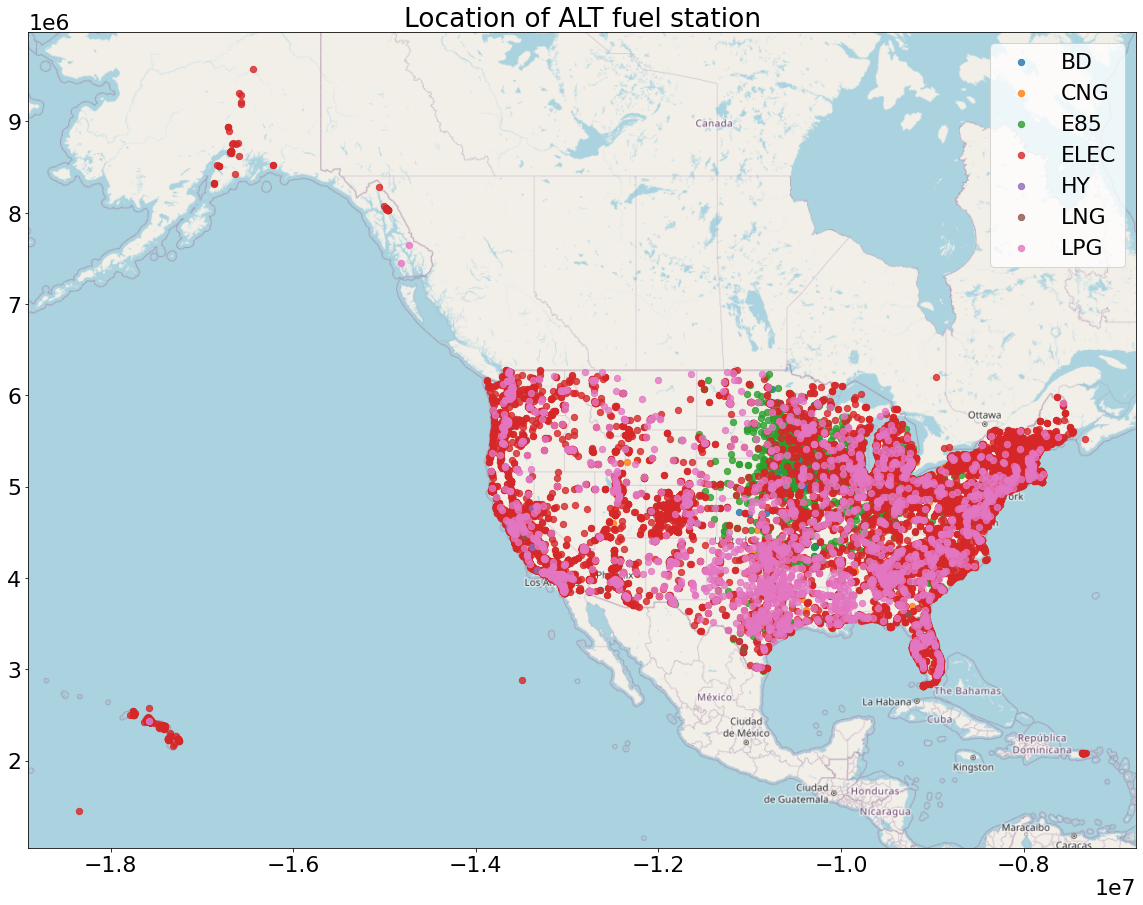

In [16]:
groups =gdf_degree.groupby("Fuel Type Code")
fig, ax = plt.subplots(figsize=(22, 15))
for name, group in groups:
  group.to_crs(epsg=3857).plot(
               ax=ax,figsize=(12,12),
               markersize=40,
               alpha=0.8,
               marker="o",
               label=name    
            );
ax.legend() 
ax.set_title("Location of ALT fuel station")
        
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

(-15600000.0, -7530000.0, 2500000.0, 6800000.0)

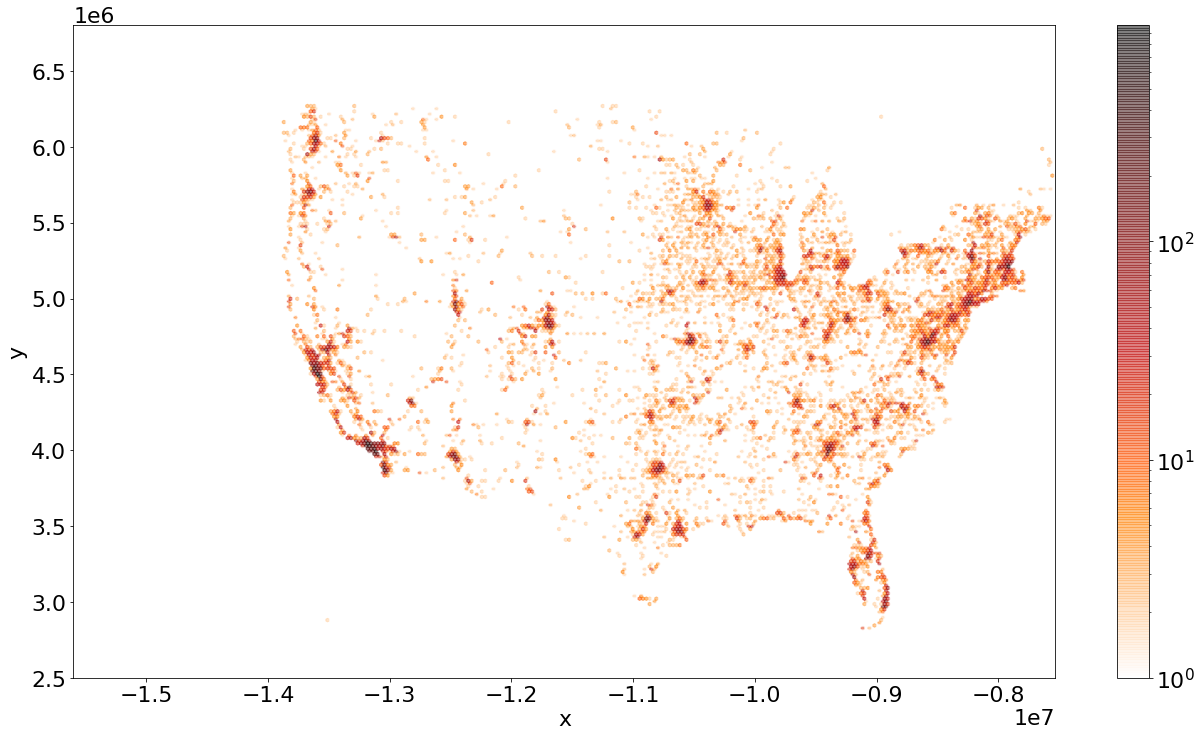

In [18]:

fig, ax = plt.subplots(figsize=(22, 12))
gdf_degree.to_crs(epsg=3857).plot(ax = ax,
                 x="x",
                 y="y",
                 kind = "hexbin",
                 cmap="gist_heat_r",
                 alpha=0.5,
                 gridsize=400,
                 bins ="log");
extent = (-15600000, -7530000, 2500000, 6800000)
ax.axis(extent)
# ctx.add_basemap(ax)
# ax.set_title("Density of ALT fuel station in US")
# ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# 3. Data cleaning and preprocessing

## 3.1 Drop the columns and NAN data

In [19]:
df1.dropna(how="all", axis=1, inplace= True)

In [20]:
df1.columns

Index(['Fuel Type Code', 'Station Name', 'Street Address',
       'Intersection Directions', 'City', 'State', 'ZIP', 'Station Phone',
       'Status Code', 'Groups With Access Code', 'Access Days Time',
       'Cards Accepted', 'BD Blends', 'NG Fill Type Code', 'NG PSI',
       'EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count',
       'EV Other Info', 'EV Network', 'EV Network Web', 'Geocode Status',
       'Latitude', 'Longitude', 'Date Last Confirmed', 'ID', 'Updated At',
       'Owner Type Code', 'Federal Agency ID', 'Federal Agency Name',
       'Open Date', 'Hydrogen Status Link', 'NG Vehicle Class', 'LPG Primary',
       'E85 Blender Pump', 'EV Connector Types', 'Country',
       'Groups With Access Code (French)', 'Hydrogen Is Retail', 'Access Code',
       'Access Detail Code', 'Federal Agency Code', 'Facility Type',
       'CNG Dispenser Num', 'CNG On-Site Renewable Source',
       'CNG Total Compression Capacity', 'CNG Storage Capacity',
       'LNG On-Site Renew

In [21]:
df1.drop(["Station Name", "Street Address", 'Intersection Directions', "ZIP", "Country", "Status Code", "Access Code", "LNG On-Site Renewable Source", "Hydrogen Standards", "LNG Vehicle Class" ], axis=1, inplace= True)

In [22]:
df1.columns

Index(['Fuel Type Code', 'City', 'State', 'Station Phone',
       'Groups With Access Code', 'Access Days Time', 'Cards Accepted',
       'BD Blends', 'NG Fill Type Code', 'NG PSI', 'EV Level1 EVSE Num',
       'EV Level2 EVSE Num', 'EV DC Fast Count', 'EV Other Info', 'EV Network',
       'EV Network Web', 'Geocode Status', 'Latitude', 'Longitude',
       'Date Last Confirmed', 'ID', 'Updated At', 'Owner Type Code',
       'Federal Agency ID', 'Federal Agency Name', 'Open Date',
       'Hydrogen Status Link', 'NG Vehicle Class', 'LPG Primary',
       'E85 Blender Pump', 'EV Connector Types',
       'Groups With Access Code (French)', 'Hydrogen Is Retail',
       'Access Detail Code', 'Federal Agency Code', 'Facility Type',
       'CNG Dispenser Num', 'CNG On-Site Renewable Source',
       'CNG Total Compression Capacity', 'CNG Storage Capacity',
       'E85 Other Ethanol Blends', 'EV Pricing', 'LPG Nozzle Types',
       'Hydrogen Pressures', 'CNG Fill Type Code', 'CNG PSI',
       'CN

In [23]:
df1.drop(['Station Phone','Groups With Access Code', 'Access Days Time', 'Cards Accepted','BD Blends','NG Fill Type Code', 'NG PSI', 'EV Level1 EVSE Num',
       'EV Level2 EVSE Num', 'EV DC Fast Count', 'EV Other Info', 'EV Network',
       'EV Network Web','Date Last Confirmed',  'Updated At', 'Federal Agency ID', 'Federal Agency Name', 'Open Date',
       'Hydrogen Status Link', 'NG Vehicle Class', 'LPG Primary',
       'E85 Blender Pump', 'EV Connector Types',
       'Groups With Access Code (French)', 'Hydrogen Is Retail',
       'Access Detail Code', 'Federal Agency Code','LPG Nozzle Types'], axis=1, inplace= True)

In [24]:
df1.head(12)

,Fuel Type Code,City,State,Geocode Status,Latitude,Longitude,ID,Owner Type Code,Facility Type,CNG Dispenser Num,CNG On-Site Renewable Source,CNG Total Compression Capacity,CNG Storage Capacity,E85 Other Ethanol Blends,EV Pricing,Hydrogen Pressures,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,EV On-Site Renewable Source,Restricted Access,geometry,x,y
0,CNG,Fort Smith,AR,200-9,35.362213,-94.375338,73,T,UTILITY,1.0,NONE,250.0,57855.0,NaN,NaN,NaN,Q,3600,MD,NaN,False,POINT (-94.37534 35.36221),-1.050581e+07,4.213214e+06
1,CNG,East Boston,MA,GPS,42.374706,-71.026549,81,SG,AIRPORT,4.0,NONE,850.0,NaN,NaN,NaN,NaN,Q,3000 3600,MD,NaN,False,POINT (-71.02655 42.37471),-7.906639e+06,5.217275e+06
2,CNG,Everett,MA,200-8,42.393167,-71.064352,84,T,STANDALONE_STATION,1.0,NONE,425.0,NaN,NaN,NaN,NaN,Q,3000 3600,HD,NaN,False,POINT (-71.06435 42.39317),-7.910847e+06,5.220057e+06
3,CNG,Brooklyn,NY,200-8,40.718037,-73.932309,108,T,UTILITY,1.0,NONE,1200.0,NaN,NaN,NaN,NaN,Q,3000 3600,HD,NaN,False,POINT (-73.93231 40.71804),-8.230107e+06,4.970841e+06
4,CNG,Brooklyn,NY,200-8,40.645540,-73.918344,112,T,UTILITY,1.0,NONE,525.0,NaN,NaN,NaN,NaN,B,3000 3600,MD,NaN,False,POINT (-73.91834 40.64554),-8.228552e+06,4.960199e+06
5,CNG,New York,NY,200-9,40.752903,-74.005831,124,T,UTILITY,1.0,NaN,300.0,NaN,NaN,NaN,NaN,Q,3600,MD,NaN,False,POINT (-74.00583 40.75290),-8.238291e+06,4.975963e+06
6,CNG,New York,NY,200-8,40.729175,-73.973310,125,T,UTILITY,1.0,NaN,300.0,NaN,NaN,NaN,NaN,Q,3600,MD,NaN,False,POINT (-73.97331 40.72917),-8.234671e+06,4.972477e+06
7,CNG,Bronx,NY,GPS,40.844188,-73.861572,129,T,UTILITY,1.0,NaN,300.0,NaN,NaN,NaN,NaN,Q,3000,MD,NaN,False,POINT (-73.86157 40.84419),-8.222233e+06,4.989387e+06
8,CNG,Rye,NY,200-9,40.979001,-73.693048,130,T,UTILITY,1.0,NaN,60.0,NaN,NaN,NaN,NaN,Q,3600,MD,NaN,False,POINT (-73.69305 40.97900),-8.203473e+06,5.009245e+06
9,CNG,Queens,NY,200-8,40.769623,-73.843069,132,T,UTILITY,1.0,NaN,300.0,NaN,NaN,NaN,NaN,Q,3000,MD,NaN,False,POINT (-73.84307 40.76962),-8.220173e+06,4.978420e+06


## 3.2 Rename the columns

In [25]:
df1.columns

Index(['Fuel Type Code', 'City', 'State', 'Geocode Status', 'Latitude',
       'Longitude', 'ID', 'Owner Type Code', 'Facility Type',
       'CNG Dispenser Num', 'CNG On-Site Renewable Source',
       'CNG Total Compression Capacity', 'CNG Storage Capacity',
       'E85 Other Ethanol Blends', 'EV Pricing', 'Hydrogen Pressures',
       'CNG Fill Type Code', 'CNG PSI', 'CNG Vehicle Class',
       'EV On-Site Renewable Source', 'Restricted Access', 'geometry', 'x',
       'y'],
      dtype='object')

In [26]:
df1.columns = ['Fuel_type', 'City', 'State', 'Geocode_status', 'Latitude',
       'Longitude', 'ID', 'Owner_type', 'Facility_type', 'CNG_dispenser_num',
       'CNG_onsite_renewable_source', 'CNG_total_compression_capacity',
       'CNG_storage_capacity', 'E85_other_ethanol_blends', 'EV_pricing',
       'Hydrogen_pressures', 'CNG_fill_type', 'CNG_PSI',
       'CNG_vehicle_class', 'EV_Onsite_renewable_source', 'Restricted_access',
       'geometry','x',
       'y']

In [27]:
df1.head(5)

,Fuel_type,City,State,Geocode_status,Latitude,Longitude,ID,Owner_type,Facility_type,CNG_dispenser_num,CNG_onsite_renewable_source,CNG_total_compression_capacity,CNG_storage_capacity,E85_other_ethanol_blends,EV_pricing,Hydrogen_pressures,CNG_fill_type,CNG_PSI,CNG_vehicle_class,EV_Onsite_renewable_source,Restricted_access,geometry,x,y
0,CNG,Fort Smith,AR,200-9,35.362213,-94.375338,73,T,UTILITY,1.0,NONE,250.0,57855.0,NaN,NaN,NaN,Q,3600,MD,NaN,False,POINT (-94.37534 35.36221),-1.050581e+07,4.213214e+06
1,CNG,East Boston,MA,GPS,42.374706,-71.026549,81,SG,AIRPORT,4.0,NONE,850.0,NaN,NaN,NaN,NaN,Q,3000 3600,MD,NaN,False,POINT (-71.02655 42.37471),-7.906639e+06,5.217275e+06
2,CNG,Everett,MA,200-8,42.393167,-71.064352,84,T,STANDALONE_STATION,1.0,NONE,425.0,NaN,NaN,NaN,NaN,Q,3000 3600,HD,NaN,False,POINT (-71.06435 42.39317),-7.910847e+06,5.220057e+06
3,CNG,Brooklyn,NY,200-8,40.718037,-73.932309,108,T,UTILITY,1.0,NONE,1200.0,NaN,NaN,NaN,NaN,Q,3000 3600,HD,NaN,False,POINT (-73.93231 40.71804),-8.230107e+06,4.970841e+06
4,CNG,Brooklyn,NY,200-8,40.645540,-73.918344,112,T,UTILITY,1.0,NONE,525.0,NaN,NaN,NaN,NaN,B,3000 3600,MD,NaN,False,POINT (-73.91834 40.64554),-8.228552e+06,4.960199e+06


# 4. Data exploration analysis

## 4.1 Find top 5 types of ALT station 

In [28]:
df_type = df1.groupby(["Fuel_type"], sort=True)["Fuel_type"].count().reset_index(name='count').sort_values(["count"], ascending=False).head(5)
df_type

,Fuel_type,count
3,ELEC,48238
2,E85,4174
6,LPG,2420
0,BD,818
1,CNG,813


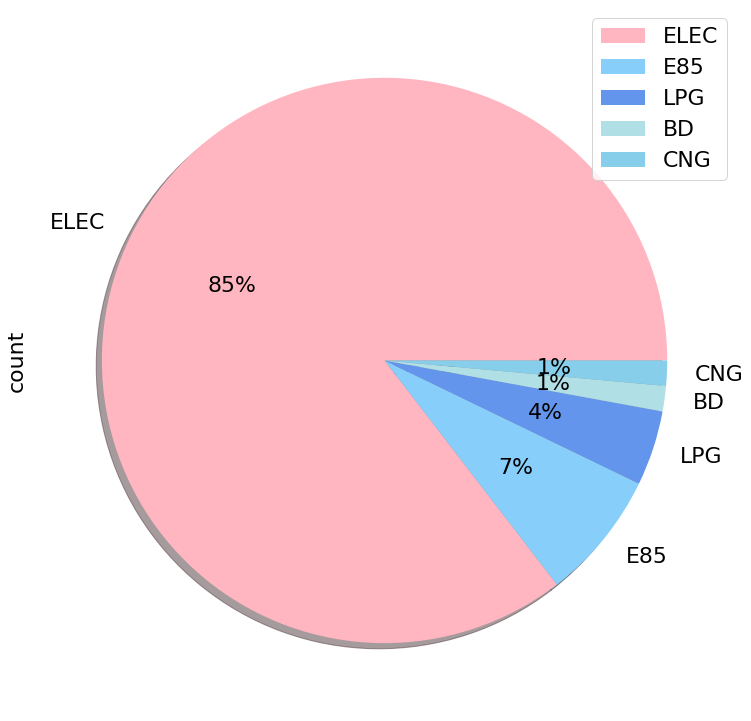

In [29]:
df_type.plot.pie(y='count', figsize=(13, 13), labels=["ELEC", "E85", "LPG", "BD", "CNG", "HY", "LNG"], autopct='%.0f%%', shadow=True, colors=["lightpink", 'lightskyblue', 'cornflowerblue', 'powderblue', 'skyblue', "steelblue", "royalblue"])
plt.rcParams.update({'font.size': 25})


In [ ]:
#EV registration 
%cd /content/drive/MyDrive/Colab Notebooks/my_project

/content/drive/MyDrive/Colab Notebooks/my_project


## 4.2 ALT  fuel station by states

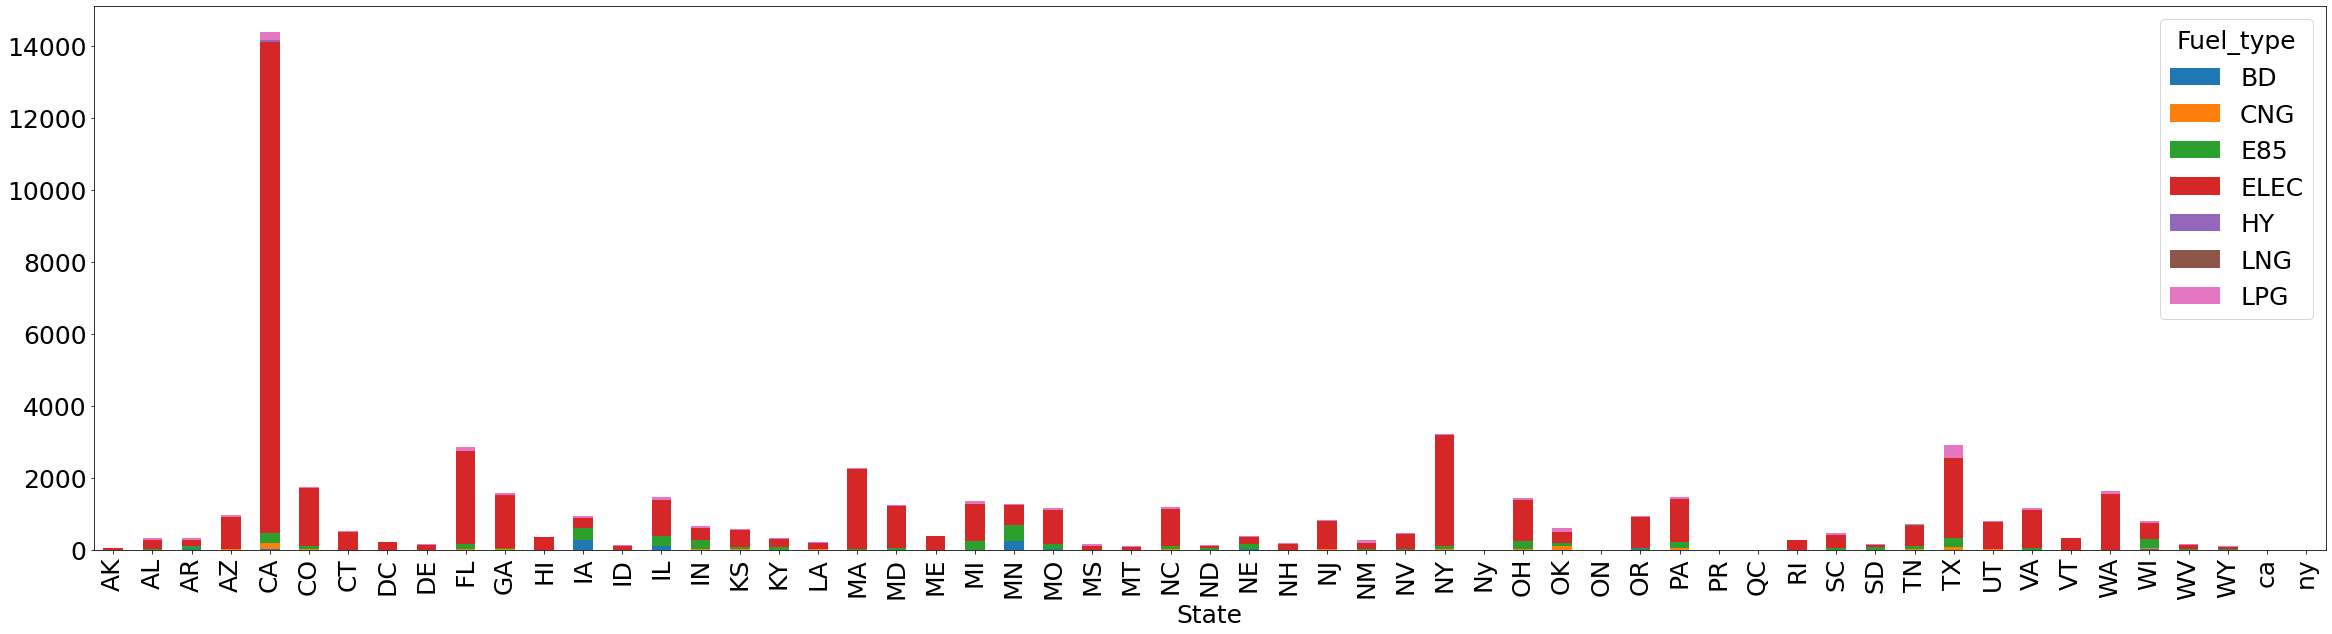

In [36]:
df_state.unstack(level=1).plot.bar( figsize=(40,10),stacked=True)

In [37]:
# merge the "ca"
df1[df1["State"] =="ny"]

,Fuel_type,City,State,Geocode_status,Latitude,Longitude,ID,Owner_type,Facility_type,CNG_dispenser_num,CNG_onsite_renewable_source,CNG_total_compression_capacity,CNG_storage_capacity,E85_other_ethanol_blends,EV_pricing,Hydrogen_pressures,CNG_fill_type,CNG_PSI,CNG_vehicle_class,EV_Onsite_renewable_source,Restricted_access,geometry,x,y
16769,ELEC,Rochester,ny,GPS,43.159975,-77.616663,123086,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-77.61666 43.15998),-8.640247e+06,5.336353e+06


In [41]:
df1.loc[df1["State"] == "ny", "State"] = "NY"
df1.loc[df1["State"] == "ca", "State"] = "CA"

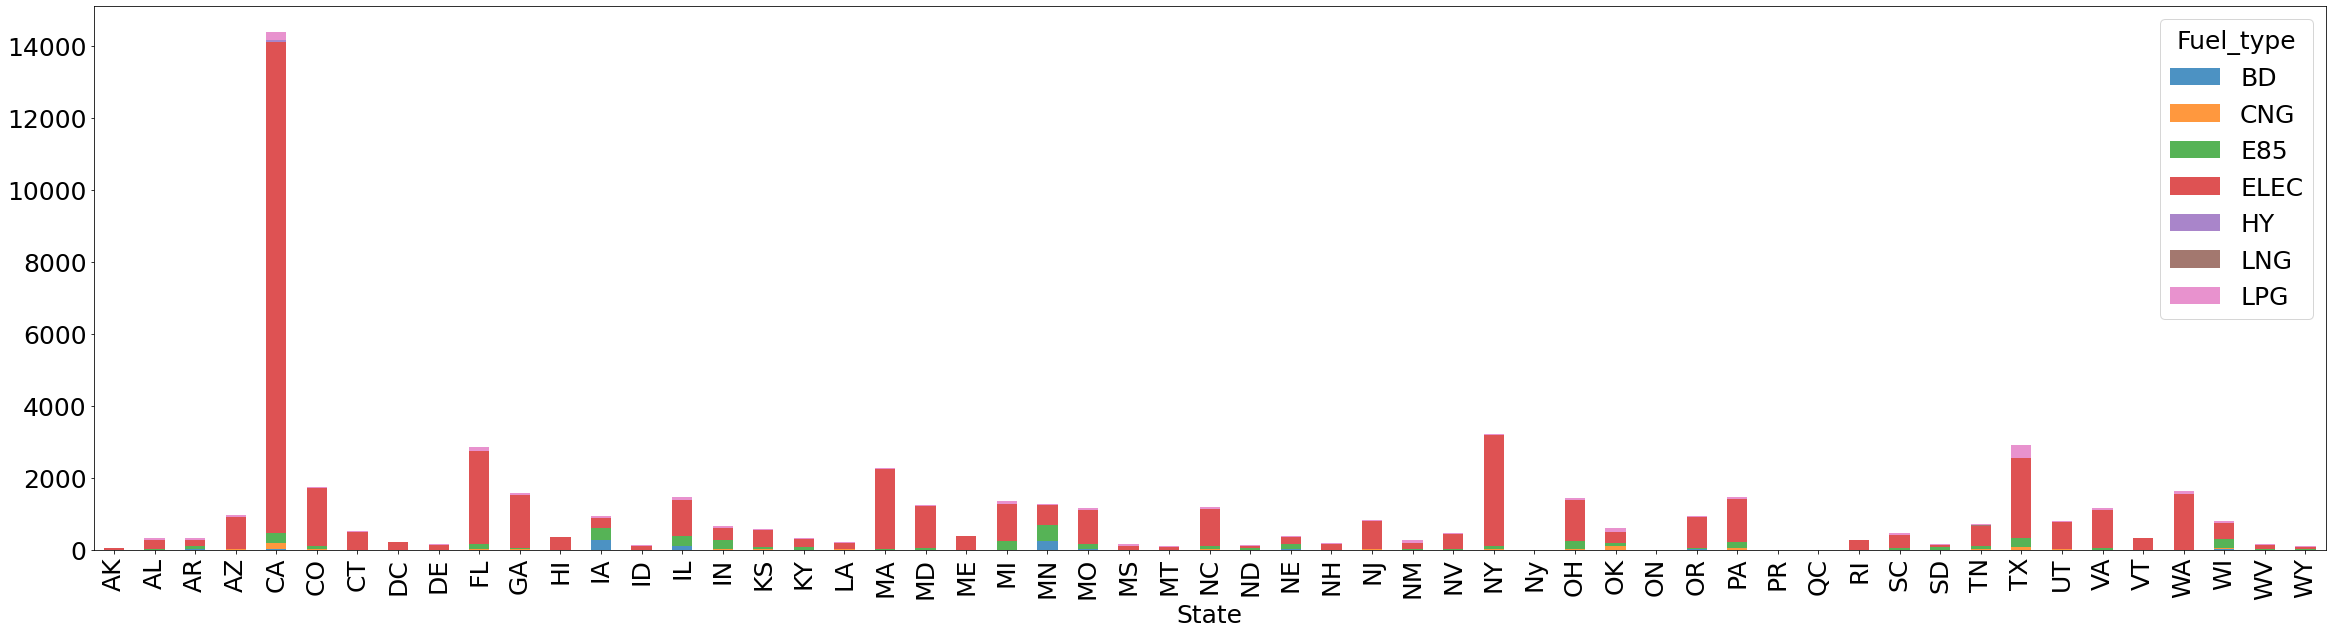

In [42]:
df_state = df1.groupby(["State", "Fuel_type"])["ID"].count()
df_state.unstack(level=1).plot.bar(figsize=(40,10),stacked=True, alpha=0.8)


In [44]:
df_state = df1.groupby(["State", "Fuel_type"])["ID"].count().reset_index(name ="count").sort_values("count", ascending=False)
df_state


,State,Fuel_type,count
23,CA,ELEC,13637
163,NY,ELEC,3087
44,FL,ELEC,2574
95,MA,ELEC,2233
211,TX,ELEC,2231
...,...,...,...
191,RI,BD,1
197,SC,LNG,1
206,TN,LNG,1
214,UT,BD,1


## 4.3 Merge EV registration data with ELEC station data

this section merged the ALT fuel station with the electric vehicle registration in 2022 in each stastes, which can reflect the usage of ELEC station with the car

### Load EV registration data

In [45]:
df_ev_reg = pd.read_csv("EV_registration_2022.csv")

In [46]:
df_ev_reg.columns
df_ev_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   State                 51 non-null     object
 1    Registration Count   51 non-null     object
dtypes: object(2)
memory usage: 944.0+ bytes


In [47]:
# convert object into float
df_ev_reg[' Registration Count ']=df_ev_reg[' Registration Count '].str.replace(',','')
df_ev_reg[ ' Registration Count '] = df_ev_reg[ ' Registration Count '].astype(float)
df_ev_reg = df_ev_reg.sort_values([ ' Registration Count '], ascending=False)

In [48]:
df_state
df_state_ev = df_state[df_state["Fuel_type"] =="ELEC"]

<Figure size 1800x1224 with 0 Axes>

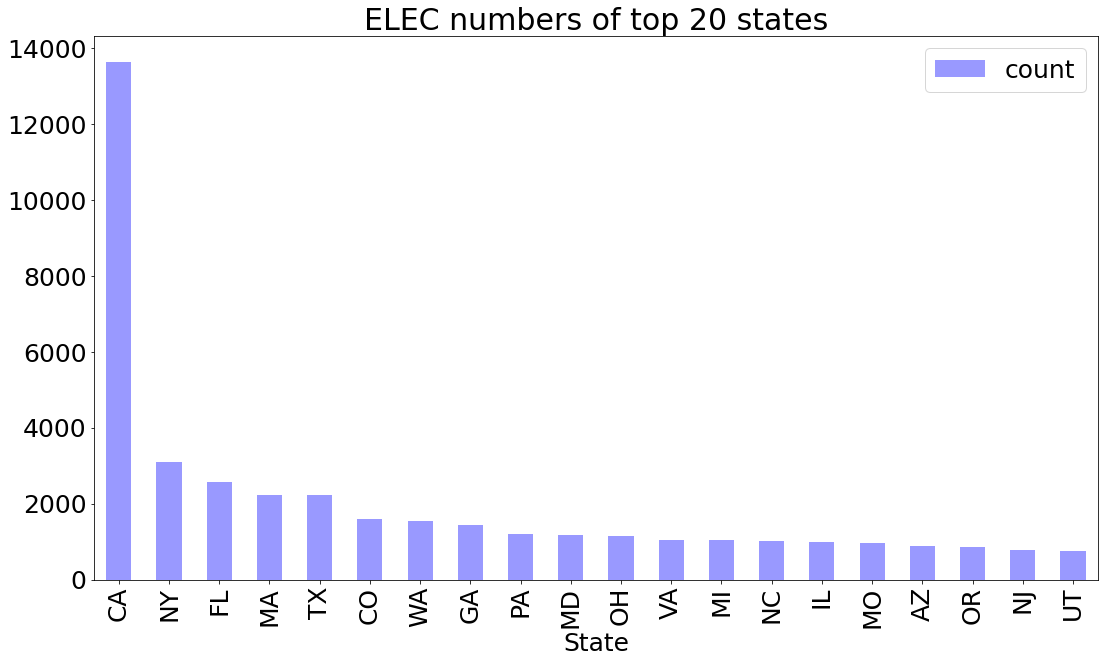

In [49]:
plt.figure(figsize=(25,17))
df_state_ev.head(20).plot.bar(x="State", y="count", color="b", alpha=0.4, figsize=(18,10))
plt.title("ELEC numbers of top 20 states")
plt.rcParams.update({'font.size': 20})

### The ALT station data saved states in short abbreviation, the EV registration data saved in full name. Created the dict to make them in the accordance

In [51]:
states = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
states = {state: abbrev for state, abbrev in states.items()}
    

In [52]:
df_ev_reg["State"] = df_ev_reg["State"].map(states)
df_ev_reg.reset_index(inplace=True)
df_ev_reg

,index,State,Registration Count
0,4,CA,563070.0
1,9,FL,95640.0
2,43,TX,80900.0
3,47,WA,66810.0
4,32,NY,51870.0
5,30,NJ,47830.0
6,2,AZ,40740.0
7,5,CO,37000.0
8,13,IL,36520.0
9,10,GA,34020.0


In [53]:
df_ev_reg.columns

Index(['index', 'State', ' Registration Count '], dtype='object')

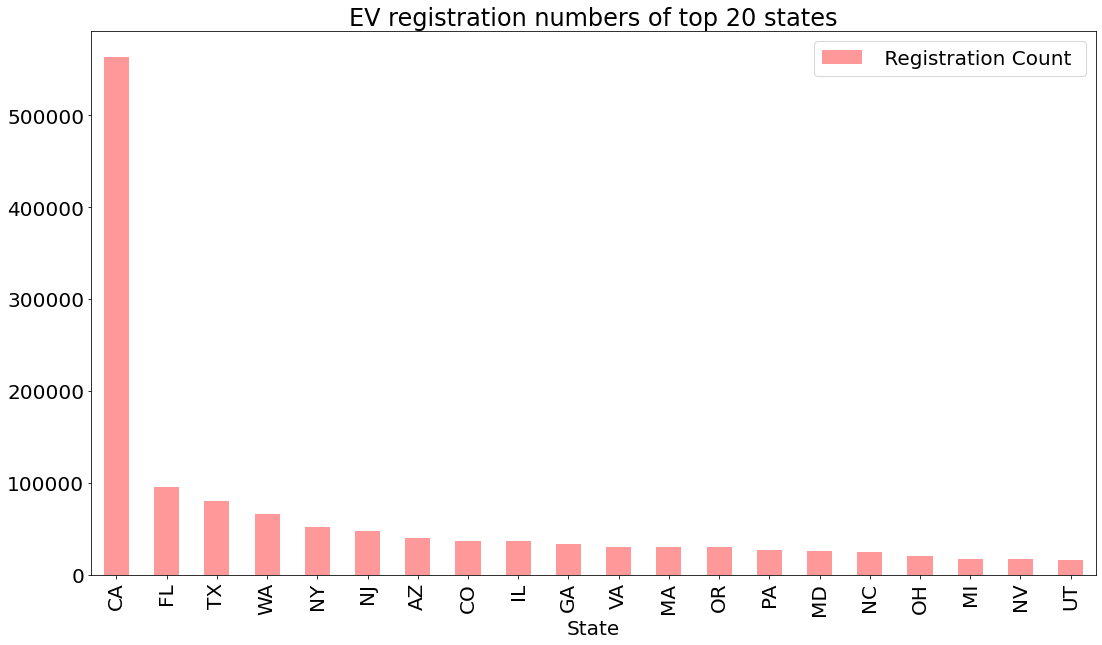

In [54]:
df_ev_reg.head(20).plot.bar(x="State", y=' Registration Count ', color="r", alpha=0.4, figsize=(18,10))
plt.title("EV registration numbers of top 20 states")
plt.rcParams.update({'font.size': 15})

In [55]:
df_merge = pd.merge(
    df_ev_reg,
    df_state_ev,
    how="inner",
    on="State"
)
df_merge

,index,State,Registration Count,Fuel_type,count
0,4,CA,563070.0,ELEC,13637
1,9,FL,95640.0,ELEC,2574
2,43,TX,80900.0,ELEC,2231
3,47,WA,66810.0,ELEC,1552
4,32,NY,51870.0,ELEC,3087
5,30,NJ,47830.0,ELEC,786
6,2,AZ,40740.0,ELEC,891
7,5,CO,37000.0,ELEC,1599
8,13,IL,36520.0,ELEC,985
9,10,GA,34020.0,ELEC,1449


In [56]:
df_merge.columns
df_merge['reg_pert'] = [x/df_merge[' Registration Count '].sum() for x in df_merge[' Registration Count ']]
df_merge['ev_station_perc'] = [x/df_merge['count'].sum() for x in df_merge['count']]
df_merge['station_EVs_ratio'] = [y/x for x, y  in zip(df_merge[' Registration Count '], df_merge['count'])]

In [57]:
df_merge

,index,State,Registration Count,Fuel_type,count,reg_pert,ev_station_perc,station_EVs_ratio
0,4,CA,563070.0,ELEC,13637,0.387128,0.282802,0.024219
1,9,FL,95640.0,ELEC,2574,0.065755,0.053379,0.026913
2,43,TX,80900.0,ELEC,2231,0.055621,0.046266,0.027577
3,47,WA,66810.0,ELEC,1552,0.045934,0.032185,0.023230
4,32,NY,51870.0,ELEC,3087,0.035662,0.064018,0.059514
5,30,NJ,47830.0,ELEC,786,0.032885,0.016300,0.016433
6,2,AZ,40740.0,ELEC,891,0.028010,0.018477,0.021870
7,5,CO,37000.0,ELEC,1599,0.025439,0.033160,0.043216
8,13,IL,36520.0,ELEC,985,0.025109,0.020427,0.026972
9,10,GA,34020.0,ELEC,1449,0.023390,0.030049,0.042593


Text(0.5, 1.0, 'ELEC station and EVs ratio by states')

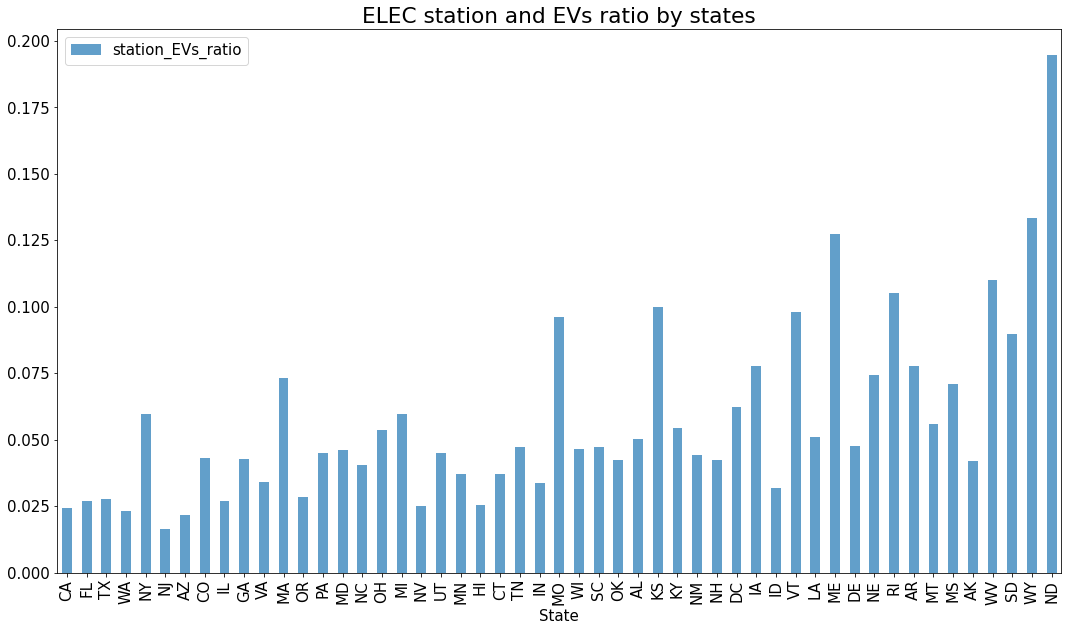

In [58]:
# ax = df_merge.plot.bar(x="State", y=['reg_pert', 'ev_station_perc'], figsize = (18,10), stacked=True)
ax = df_merge.plot.bar(x="State", y=['station_EVs_ratio'],figsize = (18,10), stacked=True, alpha = 0.7)
plt.rcParams.update({'font.size': 18})
plt.title("ELEC station and EVs ratio by states")

the elec station number per each vehicle in each state. NJ, NV are the lowest state. However, CA has the largest number of ev and station, but the percetage of each velicle is about 0.025. ND has the highest ratio, which reaches to 0.19.

# 5 Geolocation visualization of ELEC IN CA
Ca has the highest number of ALT station among US and in which ELEC type is the top. 

## 5.1 ELEC analyze in CA

In [61]:
df_city = df1[df1["State"] == "CA"].groupby(["City", "Fuel_type"])["ID"].count().reset_index(name='count').sort_values(["count"], ascending=False).head(20)

In [62]:
df_city

,City,Fuel_type,count
570,Los Angeles,ELEC,1406
912,San Diego,ELEC,686
455,Irvine,ELEC,570
931,San Jose,ELEC,505
922,San Francisco,ELEC,377
613,Menlo Park,ELEC,337
969,Santa Clara,ELEC,334
886,Sacramento,ELEC,288
709,Oakland,ELEC,202
559,Long Beach,ELEC,196


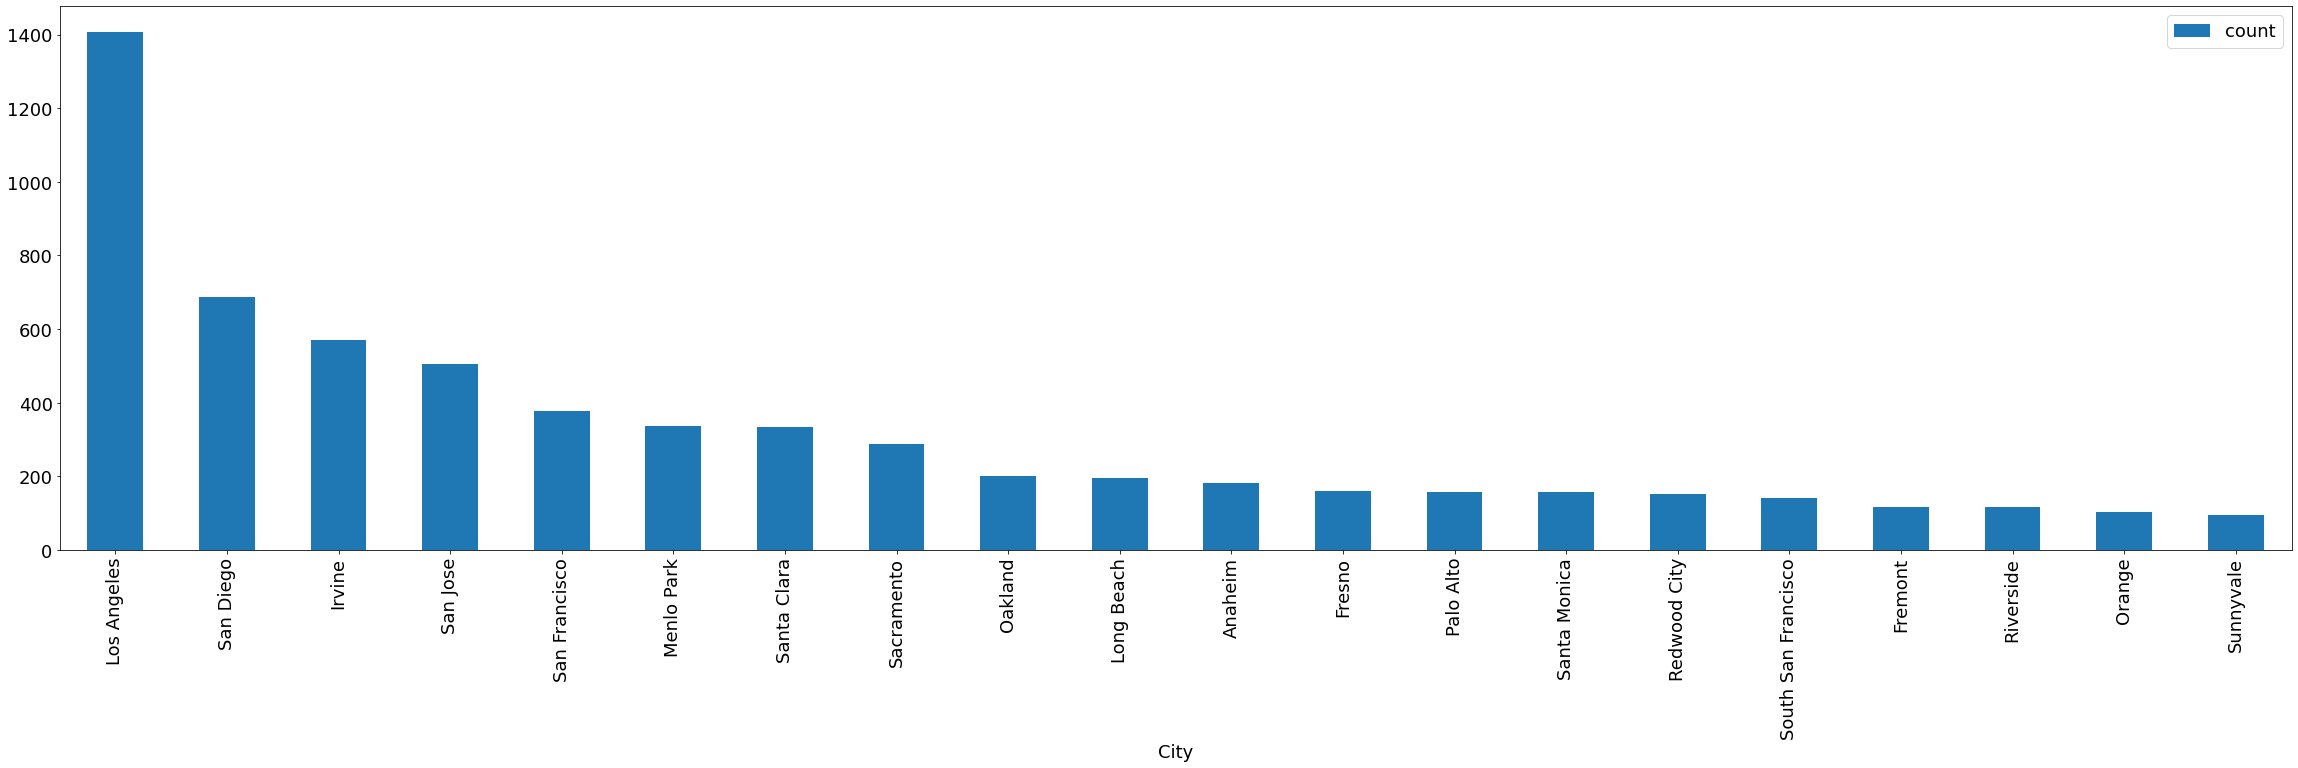

In [63]:
df_city.plot.bar(x="City", y="count", figsize=(40,10),stacked=True)


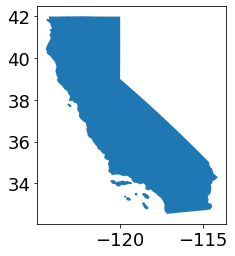

In [64]:
# Import oakland street and map data
Ca_poly = ox.geocode_to_gdf('California')
Ca_poly.plot()

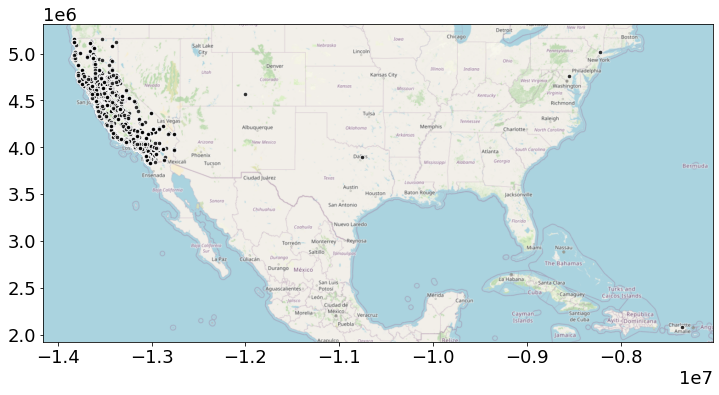

In [65]:
fig, ax = plt.subplots(figsize=(12, 10))
gdf_degree[gdf_degree["State"]=="CA"].to_crs(epsg=3857).plot(ax = ax,
                figsize=(12,12),
                markersize=20,
               color="black",
               edgecolor="white",
               alpha=0.8,
               marker="o"
            );
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

### there's some error with the dataset. Some ELEC station is not in CA but was missed saved as the CA station. Need to pick up and remove from CA dataset

In [67]:
gdf_degree_CA = gdf_degree[(gdf_degree["State"]=="CA") & (gdf_degree["Longitude"]<-110)]
gdf_degree_LA = gdf_degree[(gdf_degree["City"]=="Los Angeles")]
gdf_degree_CA.reset_index(inplace=True)

In [68]:
gdf_degree_CA.head()

,index,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,Expected Date,Groups With Access Code,Access Days Time,Cards Accepted,BD Blends,NG Fill Type Code,NG PSI,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Other Info,EV Network,EV Network Web,Geocode Status,Latitude,Longitude,Date Last Confirmed,ID,Updated At,Owner Type Code,Federal Agency ID,Federal Agency Name,Open Date,Hydrogen Status Link,NG Vehicle Class,LPG Primary,E85 Blender Pump,EV Connector Types,Country,Intersection Directions (French),Access Days Time (French),BD Blends (French),Groups With Access Code (French),Hydrogen Is Retail,Access Code,Access Detail Code,Federal Agency Code,Facility Type,CNG Dispenser Num,CNG On-Site Renewable Source,CNG Total Compression Capacity,CNG Storage Capacity,LNG On-Site Renewable Source,E85 Other Ethanol Blends,EV Pricing,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access,geometry,x,y
0,37,CNG,PG&E - Grass Valley Service Center,788 Taylorville Rd,"Exit Highway 49 at McKnight Way, west 2 blocks, and the station is on the right.",Grass Valley,CA,95949,NaN,800-684-4648,E,NaN,Public - Card key at all times,24 hours daily; Customers must set up a PG&E account in advance of fueling; Station only accepts PG&E payment card; Contact PG&E LNG/CNG at 800-684-4648 x4 for payment card and station information,Proprietor,NaN,Q,3000 3600,NaN,NaN,NaN,NaN,NaN,NaN,200-9,39.200620,-121.062126,2021-09-10,792,2022-06-16 17:09:04 UTC,T,NaN,NaN,1995-05-15,NaN,HD,NaN,NaN,NaN,US,NaN,NaN,NaN,Public - Carte-clé en tout temps,NaN,public,KEY_ALWAYS,NaN,UTILITY,1.0,NONE,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q,3000 3600,HD,NaN,NaN,False,POINT (-121.06213 39.20062),-1.347657e+07,4.750450e+06
1,38,CNG,United Parcel Service,4500 Norris Canyon Rd,"Exit I-680 at Crow Canyon Road, go west to San Ramon Valley Boulevard, then left/south to Norris Canyon Road, turn left/east, and the station on left.",San Ramon,CA,94583,NaN,800-920-1166,E,NaN,Public - Credit card at all times,24 hours daily; restricted access 6pm-10pm while UPS fuels fleet; contact station at 800-920-1166 to set up an account; Also accepts Pinnacle Fleet,M V,NaN,Q,3000 3600,NaN,NaN,NaN,NaN,NaN,NaN,200-8,37.773172,-121.968239,2022-10-11,797,2022-10-11 18:56:12 UTC,P,NaN,NaN,1995-03-02,NaN,HD,NaN,NaN,NaN,US,NaN,NaN,NaN,Public - Carte de crédit en tout temps,NaN,public,CREDIT_CARD_ALWAYS,NaN,STANDALONE_STATION,2.0,NaN,270.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q,3000 3600,HD,NaN,NaN,False,POINT (-121.96824 37.77317),-1.357744e+07,4.547432e+06
2,39,CNG,PG&E - Santa Cruz Service Center,615 7th Ave,"Exit Highway 17 to Highway 1 E toward Monterey. Exit Highway 1 at Soquel Avenue, west then south on 7th Avenue, and the station is on the right.",Santa Cruz,CA,95062,NaN,800-684-4648,E,NaN,Public - Card key at all times,8am-4pm M-F; Customers must set up a PG&E account in advance of fueling; Station only accepts PG&E payment card; Contact PG&E LNG/CNG at 800-684-4648 x4 for payment card and station information,Proprietor,NaN,Q,3000 3600,NaN,NaN,NaN,NaN,NaN,NaN,200-9,36.969267,-121.999295,2021-09-10,798,2022-06-16 17:09:04 UTC,T,NaN,NaN,1995-05-15,NaN,LD,NaN,NaN,NaN,US,NaN,NaN,NaN,Public - Carte-clé en tout temps,NaN,public,KEY_ALWAYS,NaN,UTILITY,1.0,NONE,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q,3000 3600,LD,NaN,NaN,False,POINT (-121.99930 36.96927),-1.358090e+07,4.434824e+06
3,40,CNG,PG&E - Bakersfield Service Center,4101 Wible Rd,"Exit Highway 99 at White Land, go west to Wible Road, go south, and the station is on the right.",Bakersfield,CA,93313,NaN,800-684-4648,E,NaN,Public - Card key at all times,24 hours daily; Customers must set up a PG&E account in advance of fueling; Station only accepts PG&E payment card; Contact PG&E LNG/CNG at 800-684-4648 x4 for payment card and station information,Proprietor,NaN,B,3000 3

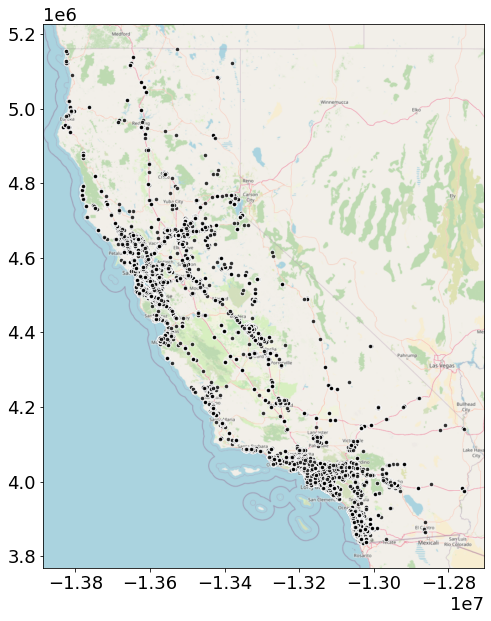

In [69]:
fig, ax = plt.subplots(figsize=(12, 10))
gdf_degree_CA.to_crs(epsg=3857).plot(ax = ax,
                figsize=(12,12),
                markersize=20,
               color="black",
               edgecolor="white",
               alpha=0.8,
               marker="o"
            );
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

## 5.2 Convert geo and spatial join

In [70]:
Ca_poly.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [71]:
gdf_degree_CA.crs

<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [72]:
# Conver geometey object -> geo df
gdf_degree = gpd.GeoDataFrame(df1, geometry=gpd.points_from_xy(df1.Longitude, df1.Latitude), crs={'init' :'epsg:4326'})
gdf_degree.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 56570 entries, 0 to 56569
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Fuel_type                       56570 non-null  object  
 1   City                            56570 non-null  object  
 2   State                           56569 non-null  object  
 3   Geocode_status                  56558 non-null  object  
 4   Latitude                        56570 non-null  float64 
 5   Longitude                       56570 non-null  float64 
 6   ID                              56570 non-null  int64   
 7   Owner_type                      22757 non-null  object  
 8   Facility_type                   21109 non-null  object  
 9   CNG_dispenser_num               813 non-null    float64 
 10  CNG_onsite_renewable_source     492 non-null    object  
 11  CNG_total_compression_capacity  514 non-null    float64 
 12  CNG_storag

/usr/local/lib/python3.8/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [73]:
# spatial-join the dataset of ELEC station with the CA polygon grid 
gpd_1_city_CA = gpd.sjoin(gdf_degree_CA, Ca_poly, how="inner", op="intersects")

gpd_1_city_CA.head(2)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
<ipython-input-73-43ec00ffe509>:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4326 +type=crs
Right CRS: EPSG:4326

  gpd_1_city_CA = gpd.sjoin(gdf_degree_CA, Ca_poly, how="inner", op="intersects")


,index,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,Expected Date,Groups With Access Code,Access Days Time,Cards Accepted,BD Blends,NG Fill Type Code,NG PSI,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Other Info,EV Network,EV Network Web,Geocode Status,Latitude,Longitude,Date Last Confirmed,ID,Updated At,Owner Type Code,Federal Agency ID,Federal Agency Name,Open Date,Hydrogen Status Link,NG Vehicle Class,LPG Primary,E85 Blender Pump,EV Connector Types,Country,Intersection Directions (French),Access Days Time (French),BD Blends (French),Groups With Access Code (French),Hydrogen Is Retail,Access Code,Access Detail Code,Federal Agency Code,Facility Type,CNG Dispenser Num,CNG On-Site Renewable Source,CNG Total Compression Capacity,CNG Storage Capacity,LNG On-Site Renewable Source,E85 Other Ethanol Blends,EV Pricing,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access,geometry,x,y,index_right,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,37,CNG,PG&E - Grass Valley Service Center,788 Taylorville Rd,"Exit Highway 49 at McKnight Way, west 2 blocks, and the station is on the right.",Grass Valley,CA,95949,NaN,800-684-4648,E,NaN,Public - Card key at all times,24 hours daily; Customers must set up a PG&E account in advance of fueling; Station only accepts PG&E payment card; Contact PG&E LNG/CNG at 800-684-4648 x4 for payment card and station information,Proprietor,NaN,Q,3000 3600,NaN,NaN,NaN,NaN,NaN,NaN,200-9,39.200620,-121.062126,2021-09-10,792,2022-06-16 17:09:04 UTC,T,NaN,NaN,1995-05-15,NaN,HD,NaN,NaN,NaN,US,NaN,NaN,NaN,Public - Carte-clé en tout temps,NaN,public,KEY_ALWAYS,NaN,UTILITY,1.0,NONE,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q,3000 3600,HD,NaN,NaN,False,POINT (-121.06213 39.20062),-1.347657e+07,4.750450e+06,0,42.009499,32.529524,-114.130782,-124.482003,307807005,relation,165475,36.701463,-118.755997,"California, United States",boundary,administrative,0.922136
1,38,CNG,United Parcel Service,4500 Norris Canyon Rd,"Exit I-680 at Crow Canyon Road, go west to San Ramon Valley Boulevard, then left/south to Norris Canyon Road, turn left/east, and the station on left.",San Ramon,CA,94583,NaN,800-920-1166,E,NaN,Public - Credit card at all times,24 hours daily; restricted access 6pm-10pm while UPS fuels fleet; contact station at 800-920-1166 to set up an account; Also accepts Pinnacle Fleet,M V,NaN,Q,3000 3600,NaN,NaN,NaN,NaN,NaN,NaN,200-8,37.773172,-121.968239,2022-10-11,797,2022-10-11 18:56:12 UTC,P,NaN,NaN,1995-03-02,NaN,HD,NaN,NaN,NaN,US,NaN,NaN,NaN,Public - Carte de crédit en tout temps,NaN,public,CREDIT_CARD_ALWAYS,NaN,STANDALONE_STATION,2.0,NaN,270.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q,3000 3600,HD,NaN,NaN,False,POINT (-121.96824 37.77317),-1.357744e+07,4.547432e+06,0,42.009499,32.529524,-114.130782,-124.482003,307807005,relation,165475,36.701463,-118.755997,"California, United States",boundary,administrative,0.922136


In [74]:
print(gpd_1_city_CA.nunique())

index                      14369
Fuel Type Code                 7
Station Name               13772
Street Address              8286
Intersection Directions      619
                           ...  
lon                            1
display_name                   1
class                          1
type                           1
importance                     1
Length: 83, dtype: int64


## 5.3 Identify road in LA


In [75]:
CA_motor = ox.graph_from_place("Los Angeles, California", network_type = 'drive', simplify=True, custom_filter = '["highway"~"motorway"]')
CA_motor_nodes, CA_motor_edges = ox.graph_to_gdfs(CA_motor)

In [76]:
CA_primary = ox.graph_from_place("Los Angeles, California", network_type = 'drive', simplify=True, custom_filter = '["highway"~"primary|primary_link"]')
CA_primary_nodes, CA_primary_edges = ox.graph_to_gdfs(CA_primary)

In [77]:
CA_secondary = ox.graph_from_place("Los Angeles, California", network_type = 'drive', simplify=True, custom_filter = '["highway"~"secondary|secondary_link"]')
CA_secondary_nodes, CA_secondary_edges = ox.graph_to_gdfs(CA_secondary)

In [78]:
CA_tertiary  = ox.graph_from_place("Los Angeles, California", network_type = 'drive', simplify=True, custom_filter = '["highway"~"tertiary|tertiary_link"]')
CA_tertiary_nodes, CA_tertiary_edges = ox.graph_to_gdfs(CA_tertiary)

## Visualized ELEC stations with primary roads

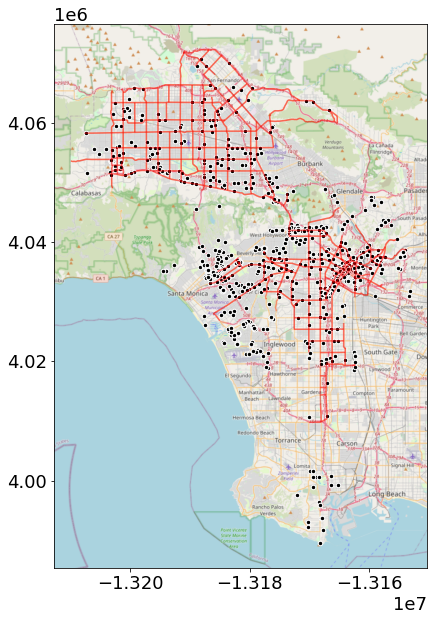

In [79]:
fig, ax = plt.subplots(figsize=(12, 10))
CA_primary_edges.to_crs(epsg=3857).plot(ax = ax,
                figsize=(12,12),
                markersize=40,
               color="red",
               edgecolor="white",
               alpha=0.3,
               marker="o"
            );
gdf_degree_LA.to_crs(epsg=3857).plot(ax = ax,
                figsize=(12,12),
                markersize=20,
               color="black",
               edgecolor="white",
          
               marker="o"
            );
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

## Visualized ELEC stations with second roads

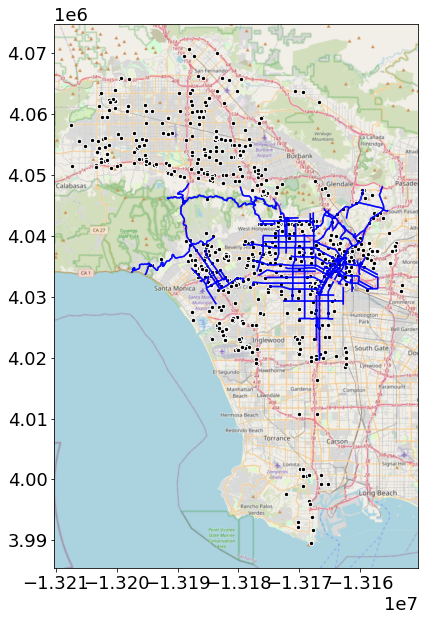

In [80]:
fig, ax = plt.subplots(figsize=(12, 10))
CA_secondary_edges.to_crs(epsg=3857).plot(ax = ax,
                figsize=(12,12),
                markersize=40,
               color="blue",
               edgecolor="white",
               alpha=0.8,
               marker="o"
            );

gdf_degree_LA.to_crs(epsg=3857).plot(ax = ax,
                figsize=(12,12),
                markersize=20,
               color="black",
               edgecolor="white",
          
               marker="o"
            );
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

## Visualized ELEC stations with tertiary roads

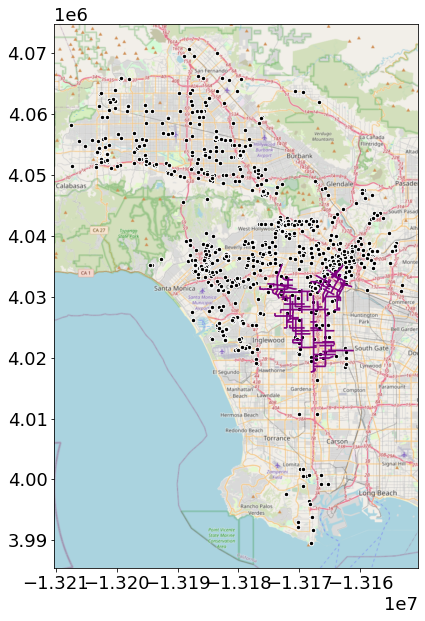

In [81]:
fig, ax = plt.subplots(figsize=(12, 10))
CA_tertiary_edges.to_crs(epsg=3857).plot(ax = ax,
                figsize=(12,12),
                markersize=40,
               color="purple",
               edgecolor="white",
               alpha=0.8,
               marker="o"
            );
gdf_degree_LA.to_crs(epsg=3857).plot(ax = ax,
                figsize=(12,12),
                markersize=20,
               color="black",
               edgecolor="white",
          
               marker="o"
            );
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

## Visualized ELEC stations with motor roads

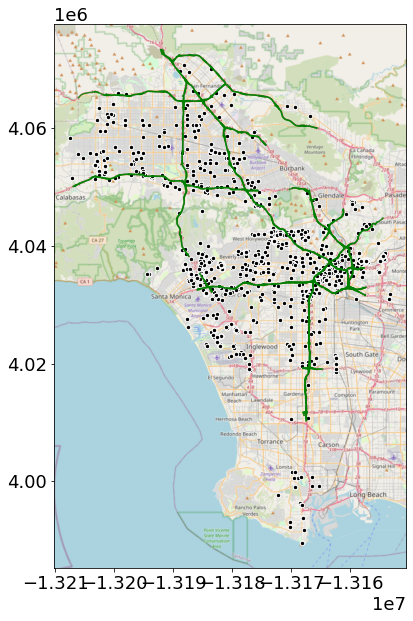

In [83]:
fig, ax = plt.subplots(figsize=(12, 10))
CA_motor_edges.to_crs(epsg=3857).plot(ax = ax,
                figsize=(12,12),
                markersize=40,
               color="green",
               edgecolor="white",
               alpha=0.8,
               marker="o"
            );
gdf_degree_LA.to_crs(epsg=3857).plot(ax = ax,
                figsize=(12,12),
                markersize=20,
               color="black",
               edgecolor="white",
          
               marker="o"
            );
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Summary
1. Load, clean, preprocessing the ALT fuel station data
2. Find the top 5 types of alternative fuel station with most number, ELEC is the highest type of ALT station in US
3. CA has the highest ALT stations and ELEC stations, LA in CA has the highest number
4. Visualized the ELEC distribution. Most ELEC distritbuted near second_roads and tertiary_roads, which distributed a lot near LA downtown. Near the end of motorway, the ELEC number is limited. 